In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])

leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

In [12]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.5001,0.000,0.0000,0.000,206.0,19179.0,206.0,14221.0,19438.0,...,1.0,0.0,100.000,20.5510,0.42105,3.0,0.85661,0.0,0.0,0
1,1894.0,1.9701,0.000,0.0000,0.000,297.0,19820.0,19820.0,176895.0,66346.0,...,3.0,0.0,100.000,63.0470,0.00000,15.0,0.94391,0.0,0.0,1
2,1774.0,0.1718,0.000,0.0000,0.000,197.0,2563.0,877.0,8869.0,3637.0,...,1.0,0.0,100.000,83.7970,0.33333,3.0,0.76467,0.0,0.0,1
3,1586.0,0.1123,5.299,0.0000,0.000,297.0,6967.0,2478.0,14171.0,0.0,...,1.0,0.0,100.000,78.8835,1.50000,0.0,0.73703,0.0,0.0,1
4,1832.0,1.4442,0.000,0.0000,0.000,179.0,7577.0,179.0,21059.0,20306.0,...,3.0,0.0,96.052,66.6650,0.00000,23.0,0.79190,0.0,0.0,0
5,1838.0,0.0544,0.241,0.0000,0.000,882.0,14039.0,10976.0,278941.0,74030.0,...,4.0,0.0,100.000,77.7800,0.00000,21.0,0.92462,0.0,0.0,0
6,1743.0,1.0753,0.272,0.0000,0.000,397.0,16141.0,3568.0,69482.0,56755.0,...,6.0,0.0,100.000,67.1590,0.00000,14.0,0.71347,0.0,0.0,0
7,1935.0,0.5601,0.000,0.0000,0.000,496.0,44919.0,17115.0,124814.0,124167.0,...,9.0,0.0,100.000,78.8835,0.00000,15.0,0.92403,0.0,0.0,0
8,1885.0,0.0811,0.000,0.0000,0.000,7369.0,19264.0,19264.0,59956.0,26633.0,...,1.0,0.0,100.000,78.8835,0.00000,5.0,0.89760,0.0,0.0,0
9,1730.0,0.7444,0.000,0.0000,0.000,0.0,2103.0,582.0,16429.0,9197.0,...,9.0,0.0,100.000,78.8835,0.05882,14.0,0.40529,0.0,0.0,1


In [13]:
#BREAK OPEN

In [14]:
#Method 3

In [15]:
#current

In [49]:
import xgboost as xgb
import time


dtrain = xgb.DMatrix(gameX, gameY)
num_round = 1000
early_stopping_rounds = 50
n_fold = 5
watchlist = [(dtrain, 'eval'), (dtrain, 'train')]

print('running cross validation')

print('running cross validation, with preprocessing function')
# define the preprocessing function
# used to return the preprocessed training, test data, and parameter
# we can use this to do weight rescale, etc.
# as a example, we try to set scale_pos_weight
def fpreproc(dtrain, dtest, param):
    label = dtrain.get_label()
    ratio = float(np.sum(label == 0)) / np.sum(label == 1)
    param['scale_pos_weight'] = ratio
    return (dtrain, dtest, param)

# do cross validation, for each fold
# the dtrain, dtest, param will be passed into fpreproc
# then the return value of fpreproc will be used to generate
# results of that fold

###
# you can also do cross validation with customized loss function
# See custom_objective.py
##
print('running cross validation, with cutomsized loss function')
#Custom
# wt = 0.5
# def logregobj(preds, dtrain):
#     labels = dtrain.get_label()
#     preds = 1.0 / (1.0 + np.exp(-preds))
#     grad = wt*(1.0-labels)*preds - (1-wt)*labels*(1-preds)
#     hess = preds * (1.0 - preds) * (wt*(1.0-labels)+(1.0-wt)*labels)
#     return grad, hess

def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds))
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'error', float(sum(labels != (preds > 0.0))) / len(labels)

param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 1, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

t = time.time()
# CV to find optimum number of boosted trees (num_round)
cvresult = xgb.cv(
            param, #param set by user
            dtrain, #train set
            num_round, #max number of boosted tree, >early_stopping_round
            nfold=n_fold, #n fold CV
            seed=0, 
            obj=logregobj, #custom loss func
            feval=evalerror, #custom eval metric
            callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                       xgb.callback.early_stop(early_stopping_rounds)], #decides optimum number of boosted trees, <num_round
#             fpreproc=fpreproc, #function for preprocessing
            )

num_round = cvresult.shape[0] #optimum number of boosted trees
# bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror, fpreproc=fpreproc)
bst = xgb.train(param, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror)

print("time taken:", time.time()-t)

running cross validation
running cross validation, with preprocessing function
running cross validation, with cutomsized loss function
[0]	train-error:0.753787	test-error:0.753787
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 50 rounds.
[1]	train-error:0.753787	test-error:0.753787
[2]	train-error:0.36955	test-error:0.371713
[3]	train-error:0.284816	test-error:0.286575
[4]	train-error:0.245163	test-error:0.247437
[5]	train-error:0.212703	test-error:0.215738
[6]	train-error:0.207472	test-error:0.21025
[7]	train-error:0.204878	test-error:0.207387
[8]	train-error:0.203591	test-error:0.205487
[9]	train-error:0.202441	test-error:0.204887
[10]	train-error:0.201412	test-error:0.203575
[11]	train-error:0.200553	test-error:0.2029
[12]	train-error:0.200172	test-error:0.202337
[13]	train-error:0.200022	test-error:0.201687
[14]	train-error:0.199413	test-error:0.201137
[15]	train-error:0.199253	test-error:0.20118

[173]	train-error:0.175697	test-error:0.190688
[174]	train-error:0.175644	test-error:0.190588
[175]	train-error:0.175528	test-error:0.190725
[176]	train-error:0.175387	test-error:0.190775
[177]	train-error:0.175337	test-error:0.190787
[178]	train-error:0.175275	test-error:0.19095
[179]	train-error:0.175141	test-error:0.1908
[180]	train-error:0.175025	test-error:0.190787
[181]	train-error:0.174984	test-error:0.1909
[182]	train-error:0.175041	test-error:0.190862
[183]	train-error:0.174965	test-error:0.19085
[184]	train-error:0.174937	test-error:0.190712
[185]	train-error:0.174797	test-error:0.190825
[186]	train-error:0.174741	test-error:0.190938
[187]	train-error:0.174666	test-error:0.191
[188]	train-error:0.174609	test-error:0.190937
[189]	train-error:0.174613	test-error:0.190887
[190]	train-error:0.174525	test-error:0.190937
[191]	train-error:0.174428	test-error:0.191025
[192]	train-error:0.174303	test-error:0.1911
[193]	train-error:0.174294	test-error:0.19125
[194]	train-error:0.17419

[135]	eval-error:0.18075	train-error:0.18075
[136]	eval-error:0.180613	train-error:0.180613
[137]	eval-error:0.180537	train-error:0.180537
[138]	eval-error:0.180663	train-error:0.180663
[139]	eval-error:0.180537	train-error:0.180537
[140]	eval-error:0.18045	train-error:0.18045
[141]	eval-error:0.180537	train-error:0.180537
[142]	eval-error:0.180512	train-error:0.180512
[143]	eval-error:0.18045	train-error:0.18045
[144]	eval-error:0.180537	train-error:0.180537
[145]	eval-error:0.1804	train-error:0.1804
[146]	eval-error:0.18035	train-error:0.18035
[147]	eval-error:0.180388	train-error:0.180388
[148]	eval-error:0.1804	train-error:0.1804
[149]	eval-error:0.18025	train-error:0.18025
[150]	eval-error:0.18015	train-error:0.18015
[151]	eval-error:0.180025	train-error:0.180025
[152]	eval-error:0.179838	train-error:0.179838
[153]	eval-error:0.179762	train-error:0.179762
[154]	eval-error:0.179613	train-error:0.179613
[155]	eval-error:0.17965	train-error:0.17965
[156]	eval-error:0.179675	train-err

In [64]:
#910k
param = {
#     'max_depth': 3,#3 
    'eta': 0.1, #0.1
    'silent': 1, 
    'gamma': 0, 
    'max_depth': 4, #4
    'min_child_weight': 1.5, #1
    'subsample': 0.8, #0.8
    'colsample_bytree': 0.8, #0,8
    'reg_lambda': 1, #L2 reg default:1
    'reg_alpha': 0.05, #L1 reg default:0
    'scale_pos_weight': 0.25, 
#     'missing': -999
#     'objective': 'binary:logistic', #for custom loss define it in xgb.train(obj=custom_loss)
#     'eval_metric': 'error'
}

num_round = 231

bst = xgb.train(param, dtrain, num_round, obj=logregobj, feval=evalerror)

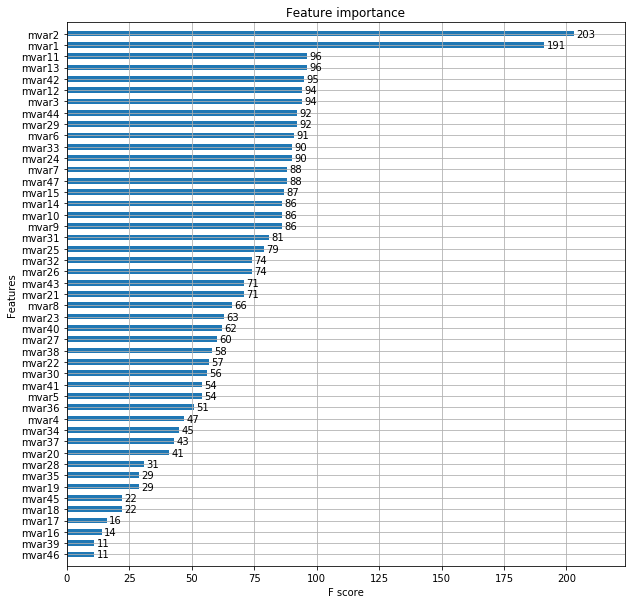

In [85]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

In [65]:
cvresult.shape[0]

166

In [66]:
bst.predict(dtrain)

array([-0.98279345, -2.33837748, -1.48666203, ...,  1.02270269,
       -1.70188737, -0.75109828], dtype=float32)

In [67]:
1/(1+np.exp(-bst.predict(dtrain)))

array([ 0.27233785,  0.08799404,  0.18442327, ...,  0.73549873,
        0.15421893,  0.32058203], dtype=float32)

In [68]:
dtest = xgb.DMatrix(leaderX)
# pred = bst.predict(leaderXxgb)

In [69]:
pred = 1/(1+np.exp(-bst.predict(dtest)))

In [70]:
pred = pd.DataFrame(pred)
pred['application_key'] = leaderAppID
pred.shape

(25000, 2)

In [71]:
pred

,0,application_key
0,0.039178,350053
1,0.057237,350054
2,0.116927,350055
3,0.633439,350056
4,0.118805,350057
5,0.005086,350058
6,0.072675,350059
7,0.004523,350060
8,0.008423,350061
9,0.245321,350062


In [72]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

In [73]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [74]:
pred = pred.loc[:,'application_key':]

In [75]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [76]:
# submit.iloc[-400:, 1] = 1

In [77]:
submit

,application_key,0
18109,368162,0
1912,351965,0
19117,369170,0
22865,372918,0
3366,353419,0
23797,373850,0
15849,365902,0
842,350895,0
11471,361524,0
3708,353761,0


In [78]:
submit.to_csv('flabbergasted_IITGuwahati_170.csv',header = False, index = False)